In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from copy import deepcopy
from collections import defaultdict

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [72]:
# node from 1 to 200
# G = nx.erdos_renyi_graph(20, 0.15,seed=101)
# >>> petersen = nx.petersen_graph()
# >>> tutte = nx.tutte_graph()
# >>> maze = nx.sedgewick_maze_graph()
# >>> tet = nx.tetrahedral_graph()

# >>> K_5 = nx.complete_graph(5)
# >>> K_3_5 = nx.complete_bipartite_graph(3, 5)
# >>> barbell = nx.barbell_graph(10, 10)
# >>> lollipop = nx.lollipop_graph(10, 20)

# >>> er = nx.erdos_renyi_graph(100, 0.15)
# >>> ws = nx.watts_strogatz_graph(30, 3, 0.1)
# >>> ba = nx.barabasi_albert_graph(100, 5)
# >>> red = nx.random_lobster(100, 0.9, 0.9)

In [3]:
def ColourToIdx(paths):
    for p in paths:
        for k, node in enumerate(p):
            p[k] = colour_to_idx[G.nodes[node]['Colour']]
    return paths

def LessThan(paths):
    print('Original: ', len(paths))
    filtered = []
    for p in paths:
        if len(p[1:-1]) != len(set(p[1:-1])):
            filtered.append(p)
    print('After: ', len(filtered))
    return filtered   

def CreateData(all_filtered, random_seed = 101):

    # idx = np.random.choice(len(t[1:-1]))
    Pleft = []
    Pright = []
    Nright= []

    if random_seed != None:
        np.random.seed(random_seed)

    # Both positive and negaive pairs will be created in this function.

    for p in all_filtered:
        occur = defaultdict(float)
        colour_idx = defaultdict(list)
        for i in [1,2,3]: # creating the occurence dict for a certain path
            occur[i] = p[1:-1].count(i)
            colour_idx[i].extend([ idx for idx, colour in enumerate(p) if colour == i])
#             colour_idx[i].extend([ idx for idx, colour in enumerate(p) if colour == i and idx != 0 and idx != len(p)-1])
        for k, colour in enumerate(p[1:-1]): # k is the index of the
            if occur[colour] >= 2:
                idx = k + 1
                Pleft.append(p[:idx+1])
                Pright.append(p[idx:][::-1])
                
                
                
                if len(p[idx:]) == 0:
                    print("Pright len = 0")
    #             N_candidate = np.delete(colour_idx[colour], idx, 0) # but the colour_idx is a list, should it be converted to a np array?
                N_candidate = deepcopy(colour_idx[colour])
#                 print(colour_idx[1],colour_idx[2],colour_idx[3])
            
#                 print(N_candidate)
#                 print(idx)
#                 print(colour)
#                 print(p)
                N_candidate.remove(idx)
    
                if 0 in N_candidate:
                    N_candidate.remove(0)
#                 print('Len-1',len(p)-1)
                if len(p)-1 in N_candidate:
#                     print('In here')
                    N_candidate.remove(len(p)-1)

                ### Choose another idx

                another_node = np.random.choice(N_candidate)
                
                # Let the amount of the positive and negative pairs to be the same.

                # Question 1: the overlapping part of the path can be considered?
                Nright.append(p[another_node:][::-1])
                
                                
                if len(p[another_node:]) == 0:
                    print("Nright len = 0")
                    print("Another node: ",another_node)
#                     print(p[another_node:])
                    print('p: ',p)
                    print('Candidate: ',N_candidate)

                # Solution 1: can be solved by run throgh all the nodes in the path

                # S1: remove current idx and random choice another idx with the same colour


    assert len(Pleft) == len(Pright) and len(Pright) == len(Nright)
    
    return Pleft, Pright, Nright    
            
            # Solution 2: use colour_idx to directly create the pairs
        
        
def CreateData_NoColour(all_filtered, random_seed = 101):

    Pleft = []
    Pright = []
    Nright = []
    
    if random_seed != None:
        np.random.seed(random_seed)       
        
    for p in all_filtered:
        
        for i in range(len(p[1:-1])):
            
            idx = i + 1

            Pleft.append(p[:idx+1])
            Pright.append(p[idx:])
            N_candidate = list(np.arange(len(p)-2) +1) # remove the first and the last 
            N_candidate.remove(idx)

            Nright.append(p[np.random.choice(N_candidate):])
            
    assert len(Pleft) == len(Pright) and len(Pright) == len(Nright)
            
    return Pleft, Pright, Nright 
            

def TransferToDf(Pleft, Pright, Nright):
    
    data = []
    
    for i in range(len(Pleft)):
        
        data.append({
            'left':Pleft[i],
            'right':Pright[i],
            'target':0
        })
        
        data.append({
            'left':Pleft[i],
            'right':Nright[i],
            'target':1
        })
    
    return pd.DataFrame(data)  
    

In [4]:
'''
optins:
1. random_lobster: nx.random_lobster(100, 0.9, 0.9)
2. munaully: 
3. at least two nodes have to be on the graph for each colour (or the negative pair can't be generated)
'''

'\noptins:\n1. random_lobster: nx.random_lobster(100, 0.9, 0.9)\n2. munaully: \n'

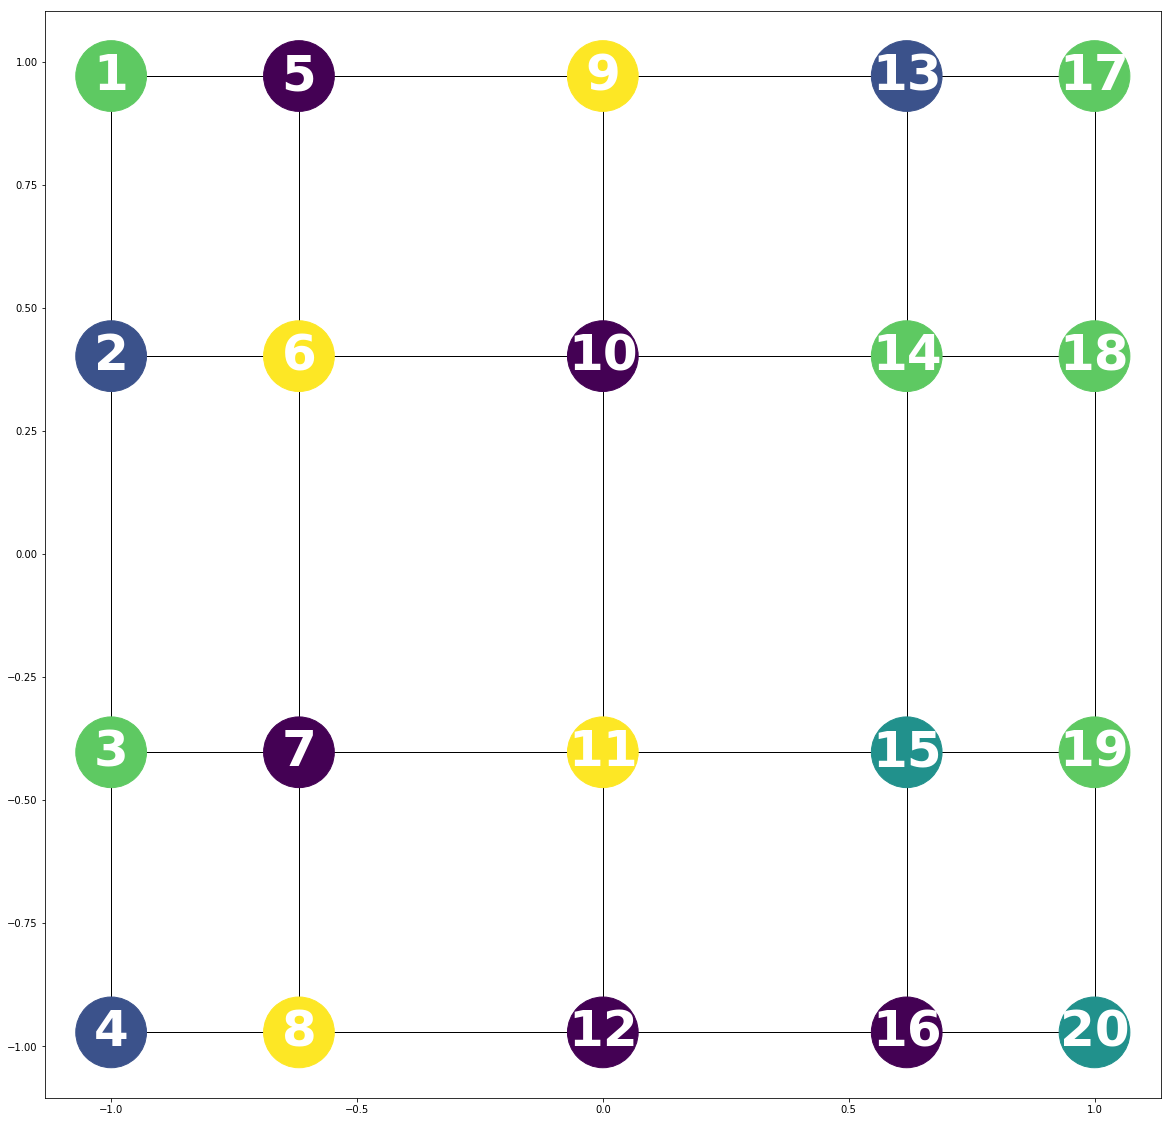

In [189]:
x = 5
y = 4
num_nodes = x * y
num_colour = 5

np.random.seed(101)
colour_list = np.arange(num_colour+1)[1:]
colour_assign = [ np.random.choice(colour_list) for i in range(num_nodes)]

colour_dict = {}
for i in range(num_nodes):
    colour_dict[i+1] = {'Colour': colour_assign[i]}
    
assert len(set(colour_assign)) == num_colour, 'Every colour has to be used on the graph.'
    
node_list = list(G.nodes)
node_list.remove(root)
colour_collection = defaultdict(list)

for node in node_list:
    colour_collection[G.nodes[node]['Colour']].append(node)

# if the # colour > 1/2 # nodes: some colours will only have one nodes on the graph; hence, it can't create negative pair.
    
for value in colour_collection.values():
    assert len(value) >= 2, 'Every colour has to be used twice on the graph or the negative pair can be generated'
    
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(x,y),1)
nx.set_node_attributes(G, colour_dict)
fig, ax = plt.subplots(figsize= (20,20))

nx.draw_networkx(G , pos=nx.spectral_layout(G), with_labels = True, node_color = colour_assign, font_size = 50,
                 font_weight = 'bold', node_size = 5000, font_color = 'white')

fig.savefig('./ColourGraph.png')

In [190]:
def SimplePathCreateData(num_pairs, root = 1):
    '''
    For generating the paths by nx.all_simple_path
    '''
    data = []
    
    for i in range(num_pairs):
        colour = np.random.choice(list(colour_collection.keys()),1)
        node_1, node_2 = np.random.choice(colour_collection[int(colour)],2, replace=False)
        left, P_right = np.random.choice(list(nx.all_simple_paths(G, root, node_1)),2, replace= False)
        N_right = np.random.choice(list(nx.all_simple_paths(G, root, node_2)))
        
        
        
        # Change to Colour
        
        left = [G.nodes[n]['Colour'] for n in left]
        P_right = [G.nodes[n]['Colour'] for n in P_right]
        N_right = [G.nodes[n]['Colour'] for n in N_right]
        
        # 
        data.append({'left': left, 'right': P_right, 'target': 1})
        data.append({'left': left, 'right': N_right, 'target': 0})
        
    return data

In [191]:
data = SimplePathCreateData(10000)

In [192]:
df = pd.DataFrame(data)

In [193]:
with open("SimplePathWith10th"+ str(num_colour)+"Colours.txt", "wb") as fp:   #Pickling
     pickle.dump(df, fp) 

In [186]:
'''
For generating the CyclePaths
'''
G = G.to_directed()
all_cycle = list(nx.simple_cycles(G))
Pleft, Pright, Nright = CreateData_NoColour(all_cycle)
df = TransferToDf(Pleft, Pright, Nright)
with open("CycleWith"+ str(num_colour)+"Colours.txt", "wb") as fp:   #Pickling
     pickle.dump(df, fp) 

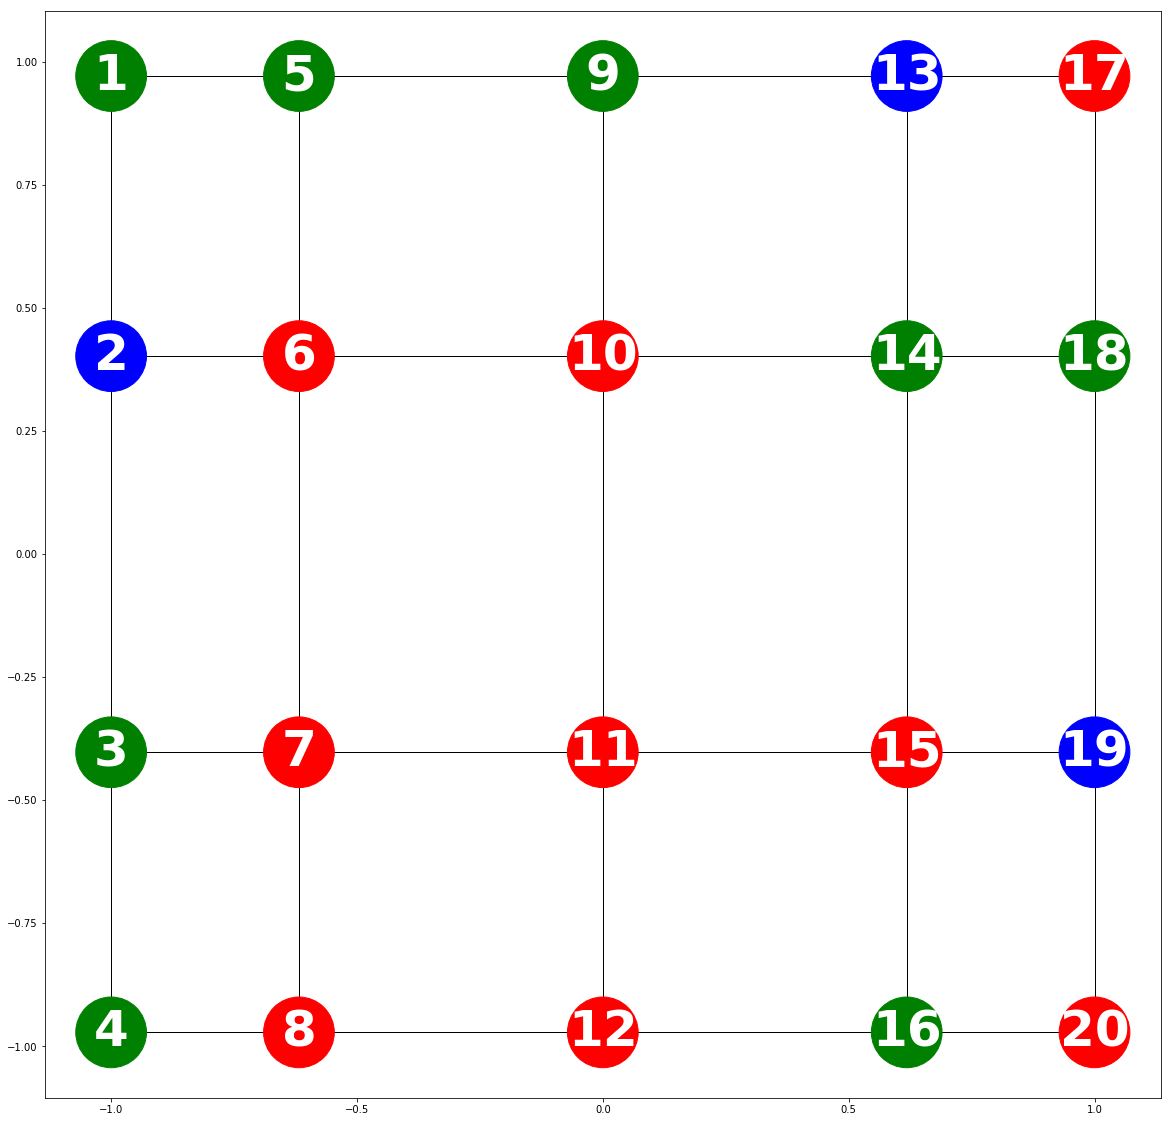

In [59]:
'''
For generating the 3 colours graph without customization of the number of colours
'''

x = 5
y = 4
num_nodes = x * y
num_colour = 5
colour_list = ['Red', 'Green', 'Blue']

colour_to_idx = {
    'Red':1,
    'Green':2,
    'Blue':3,
}
np.random.seed(101)
colour_assign = [ np.random.choice(colour_list) for i in range(num_nodes)]
colour_dict = {}
for i in range(num_nodes):
    colour_dict[i+1] = {'Colour': colour_assign[i]}
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(x,y),1)
nx.set_node_attributes(G, colour_dict)
fig, ax = plt.subplots(figsize= (20,20))
#plt.subplot(121)
#nx.draw_shell(G,with_labels=True, font_weight='bold')
#nx.draw(G, with_labels=True, font_weight='bold', font_size = 50,)

nx.draw_networkx(G , pos=nx.spectral_layout(G), with_labels = True, node_color = colour_assign, font_size = 50,
                 font_weight = 'bold', node_size = 5000, font_color = 'white')
# fig.savefig('./Graph.png')

In [49]:
G = G.to_directed()

In [68]:
all_cycle = list(nx.simple_cycles(G))
all_filtered = ColourToIdx(all_cycle)
# all_filtered = LessThan(all_colour_cycle)
Pleft, Pright, Nright = CreateData_NoColour(all_filtered)
df = TransferToDf(Pleft, Pright, Nright)

KeyError: 4

In [52]:
# add the first node to the last node
# tranfer it to the colour 
# keep the list set(P) >= 3
with open("CycleData.txt", "wb") as fp:   #Pickling
     pickle.dump(df, fp) 

In [188]:
# max_len = None 
# for l1,l2,l3 in zip(Pleft, Pright, Nright):
#     print(len(l1), len(l2), len(l3))
#     if max_len is None:
#         max_len = len(l1)
#     if len(l1) > max_len:
#         max_len = len(l1)
#     if len(l2) > max_len:
#         max_len = len(l2)
#     if len(l3) > max_len:
#         max_len = len(l3)

In [ ]:
def CreatingColourNegativePairs(num_pairs=10, seqlen= 10, random_seed=None):
    
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        while True:  
            out = []
            st_end = np.random.choice(G.nodes,3)
            if len(list(set(st_end))) < 3:
                continue
            paths_ =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
            idx = [len(i) == seqlen for i in paths_] # Certain path
            paths_len = [paths_[i] for i,n in enumerate(idx) if n]
            if len(paths_len) == 0:
                continue
            rd_idx = np.random.choice(len(paths_len), 1)
            out.append(paths_len[rd_idx[0]])

            paths_2 = list(nx.all_simple_paths(G,st_end[0],st_end[2]))
            idx_2 = [len(i) == 10 for i in paths_2]
            paths_len_2 = [paths_2[i] for i,n in enumerate(idx_2) if n]
            if len(paths_len_2) == 0:
                continue
            rd_idx_2 = np.random.choice(len(paths_len_2), 1) # only one? 
            out.append(paths_len_2[rd_idx_2[0]])
            break   
        unpaired_dict = {'left':out[0],'right':out[1],'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data

In [ ]:
occur = defaultdict(int)

In [ ]:
for i in all_filtered:
    for i in [1,2,3]:
        occur[i] = t[1:-1].count(i)    
    

In [ ]:
def TheSamllestLen(paths):
    smallest = None
    for p in paths:
        if smallest is None:
            smallest = len(p)
        else:
            if len(p) < smallest:
                smallest = len(p)
                print(p)
    return smallest

In [ ]:
TheSamllestLen(all_filtered)

In [ ]:
# add the first node
for p in all_cycle:
    p.append(p[0])

In [ ]:
# the same colour has to appear twice d

In [ ]:
list(nx.find_cycle(G,orientation='ignore'))

In [ ]:
nx.cycle_basis(G)

In [ ]:
def find_all_cycles(G, source=None, cycle_length_limit=None):
    """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
    types which work with min() and > ."""
    if source is None:
        # produce edges for all components
        nodes=[i[0] for i in nx.connected_components(G)]
    else:
        # produce edges for components with source
        nodes=[source]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]

In [ ]:
# Used for finding the path from source to target.
# Positvie Pair
# How abt the len?
# np.random.choice(list(nx.all_simple_paths(G,1,5)), size = 2)
# P: the leght is not contolable


# Draft 

# # For generating the positive paths with the same length

# while True:
#     st_end = np.random.choice(G.nodes,2)
#     paths_ =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
#     idx = [len(i) == 10 for i in paths_] # Certain path
#     # np.random.choice(list([paths_[i] for i,n in enumerate(idx) if n]),size= 2)
#     k = [paths_[i] for i,n in enumerate(idx) if n]
#     if len(k) == 0:
#         continue
#     rd_idx = np.random.choice(len(k), 2)
#     k_out = [k[i] for i in rd_idx]
#     break
    
    
#  # For generating the negaive pairs
# while True:  
#     k_out = []
#     st_end = np.random.choice(G.nodes,3)
#     if len(list(set(n)))<3:
#         continue
#     paths_1 =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
#     idx = [len(i) == 10 for i in paths_1] # Certain path
#     # np.random.choice(list([paths_[i] for i,n in enumerate(idx) if n]),size= 2)
#     k = [paths_1[i] for i,n in enumerate(idx) if n]
#     if len(k) == 0:
#         continue
#     rd_idx = np.random.choice(len(k), 1)
#     #k_out.append([k[i] for i in rd_idx])
#     k_out.append(k[rd_idx[0]])
 
#     #l = [x for x in G.nodes if x != 5] # Select a random end node,
#     ll = list(nx.all_simple_paths(G,st_end[0],st_end[2]))
#     idx_ll = [len(i) == 10 for i in ll]
#     l_l = [ll[i] for i,n in enumerate(idx_ll) if n]
#     if len(l_l) == 0:
#         continue
#     rd_idx_l = np.random.choice(len(l_l), 1) # only one? 
#     #out = [l_l[i] for i in rd_idx_l]
#     k_out.append(l_l[rd_idx_l[0]])
#     break
    

In [ ]:
def CreatingColourPositivePairs(num_pairs = 10, seqlen = 10, random_seed = None):
    
    paired_data = []
    if random_seed != None:
        np.random.seed(random_seed)    
    for i in range(num_pairs):
        while True:
            st_end = np.random.choice(G.nodes,2)
            paths_ =  list(nx.all_simple_paths(G, st_end[0], st_end[1]))
            idx = [len(i) == seqlen for i in paths_] # Certain path
            paths_len = [paths_[i] for i,n in enumerate(idx) if n]
            if len(paths_len) == 0:
                continue
            rd_idx = np.random.choice(len(paths_len), 2)
            out = [paths_len[i] for i in rd_idx]
            break
        paired_dict = {'left':out[0],'right':out[1],'target':1}
        paired_data.append(paired_dict)
        
    return paired_data

In [ ]:
def CreatingColourNegativePairs(num_pairs=10, seqlen= 10, random_seed=None):
    
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        while True:  
            out = []
            st_end = np.random.choice(G.nodes,3)
            if len(list(set(st_end))) < 3:
                continue
            paths_ =  list(nx.all_simple_paths(G,st_end[0],st_end[1]))
            idx = [len(i) == seqlen for i in paths_] # Certain path
            paths_len = [paths_[i] for i,n in enumerate(idx) if n]
            if len(paths_len) == 0:
                continue
            rd_idx = np.random.choice(len(paths_len), 1)
            out.append(paths_len[rd_idx[0]])

            paths_2 = list(nx.all_simple_paths(G,st_end[0],st_end[2]))
            idx_2 = [len(i) == 10 for i in paths_2]
            paths_len_2 = [paths_2[i] for i,n in enumerate(idx_2) if n]
            if len(paths_len_2) == 0:
                continue
            rd_idx_2 = np.random.choice(len(paths_len_2), 1) # only one? 
            out.append(paths_len_2[rd_idx_2[0]])
            break   
        unpaired_dict = {'left':out[0],'right':out[1],'target':0}
        unpaired_data.append(unpaired_dict)
        
    return unpaired_data

In [ ]:
def TransferToColourIdx(pairs):
    for p in pairs:
        for k,node in enumerate(p['left']):
            p['left'][k] = colour_to_idx[G.nodes[node]['Colour']]
        for k,node in enumerate(p['right']):
            p['right'][k] = colour_to_idx[G.nodes[node]['Colour']]
            
    return pairs

In [ ]:
num_data = 100000
a = pd.DataFrame(TransferToColourIdx(CreatingColourPositivePairs(num_data, seqlen = 10, random_seed= 101)))
b = pd.DataFrame(TransferToColourIdx(CreatingColourNegativePairs(num_data, seqlen = 10, random_seed= 101)))
data = pd.concat([a,b])
with open("PlanarColour100thData.txt", "wb") as fp:   #Pickling
     pickle.dump(data, fp) 
data

In [ ]:
# num_data = 1000
# a = pd.DataFrame(CreatingPlanerPositivePairs(num_data, seqlen=5, random_seed=101))
# b = pd.DataFrame(CreatingPlanarNegativePairs(num_data, seqlen=5, random_seed=101))
# data = pd.concat([a,b])
# with open("PlanarColourData.txt", "wb") as fp:   #Pickling
#      pickle.dump(data, fp) 
# data

# Generate random data

I use these two function to perform the random walk and generate data.

In [ ]:
# def CreatingPlanerPositivePairs(num_pairs = 10, seqlen = 5, random_seed = None):
    
#     paired_data = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         st_node = np.random.randint(1,21) # random sample a start node
#         node = st_node
#         left = []
#         right = []
#         for j in range(seqlen):
#             node = np.random.choice(list(G.adj[node]))
#             left.append(colour_to_idx[G.nodes[node]['Colour']])
#         node = st_node
#         for j in range(seqlen):
#             node = np.random.choice(list(G.adj[node]))
#             right.append(colour_to_idx[G.nodes[node]['Colour']])
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data

# def CreatingPlanarNegativePairs(num_pairs=10, seqlen= 50, prob = 0.7, random_seed=None, num_noise=1):
    
#     unpaired_data=[]
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         st_node = np.random.randint(1,21)
#         left = []
#         node = st_node 
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(colour_to_idx[G.nodes[node]['Colour']]) 
#         k=0
#         while k < num_noise:
#             k=0
#             if np.random.uniform(0,1) > 0.5:
#                 node = st_node # Use the same st_node
#             else:
#                 node = np.random.choice([x for x in np.arange(1,21) if not x == st_node])
#                 # node = np.random.randint(1,21) # or start from anotehr node
#             right = []
#             for j in range(seqlen):
#                 if  np.random.uniform(0,1) > prob:
#                     k+=1
#                     NotConnectedNodes = [x for x in np.arange(1,21) if x not in list(G.adj[node])]
#                     node =np.random.choice(NotConnectedNodes)
#                 else:    
#                     node =np.random.choice(list(G.adj[node]))
#                 right.append(colour_to_idx[G.nodes[node]['Colour']])
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data

In [ ]:
#Positive pair
# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     '''
#     number_pairs: numbers of rows will be generated
#     seqlen: The length of sequence    
#     It will randomly chose a starting node and perfrom random walk to
#     retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
#     right side and be stored in paired_dict.
#     '''
#     paired_data=[]
#     left = [] 
#     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201) 
#         nodes= [node]
#         for j in range(seqlen):
#             node =np.random.choice(list(G.adj[node]))
#             nodes.append(node)
#         splitor = np.random.randint(1,seqlen)
#         left = nodes[:splitor+1]
#         right = nodes[splitor:]
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data 

# def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
#     paired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         right = [node]
#         for j in range(seqlen-1):
#             node = np.random.choice(list(G.adj[node]))
#             right.append(node)
#         paired_dict = {'left':left,'right':right,'target':1}
#         paired_data.append(paired_dict)
#     return paired_data

# def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
#     unpaired_data=[]
# #     left = [] 
# #     right = []
#     if random_seed != None:
#         np.random.seed(random_seed)
#     for i in range(num_pairs):
#         node = np.random.randint(1,201)
#         left = [node]
#         for j in range(seqlen-1):
#             node =np.random.choice(list(G.adj[node]))
#             left.append(node)
#         st_node = node    
#         k=0
#         while k <= num_noise:
#             k=0
#             try_right=[st_node]
#             for j in range(seqlen-1):
#                 if np.random.rand() < prob:
#                     k+=1
#                     NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[try_right[-1]])]
#                     node =np.random.choice(NotConnectedNode)
#                 else:    
#                     node =np.random.choice(list(G.adj[try_right[-1]]))
#                 try_right.append(node)
#         right= try_right
#         unpaired_dict = {'left':left,'right':right,'target':0}
#         unpaired_data.append(unpaired_dict)
#     return unpaired_data

In [ ]:
# num_data = 1000
# a = pd.DataFrame(CreatingPlanerPositivePairs(num_data, seqlen=5, random_seed=101))
# b = pd.DataFrame(CreatingPlanarNegativePairs(num_data, seqlen=5, random_seed=101))
# data = pd.concat([a,b])
# with open("PlanarColourData.txt", "wb") as fp:   #Pickling
#      pickle.dump(data, fp) 
# data

In [ ]:
def sq(x):
    k = 0 
    for i in range(x):
        k += i**5
    return k

In [ ]:
%lprun -f sq sq(100)

In [ ]:
import numpy as np